### 2024-05-21 ML models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yy = pd.read_csv("yin-yang-1000.csv.bz2", sep = "\t")
yy.head()

,x,y,c
0,-1.385572,0.615115,1
1,-0.289321,-0.870948,0
2,-0.090943,-1.309658,0
3,0.649690,-1.322306,0
4,-0.992457,-0.160861,1


In [6]:
yy.sample(250)
yy.head()

,x,y,c
0,-1.385572,0.615115,1
1,-0.289321,-0.870948,0
2,-0.090943,-1.309658,0
3,0.649690,-1.322306,0
4,-0.992457,-0.160861,1


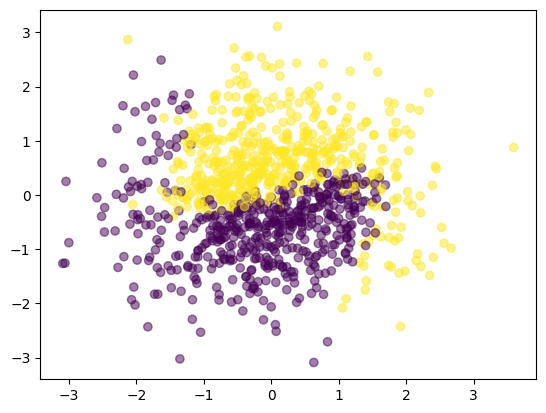

In [7]:
_ = plt.scatter(yy.x, yy.y, c = yy.c.values, alpha = 0.5)

In [8]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression(max_iter = 1000)

In [9]:
X = yy[["x","y"]].values
y = yy.c.values
X[:5]

array([[-1.38557178,  0.61511479],
       [-0.28932121, -0.87094804],
       [-0.0909432 , -1.30965798],
       [ 0.64968977, -1.32230583],
       [-0.99245709, -0.16086093]])

In [11]:
y[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [12]:
_ = m.fit(X, y)
yhat = m.predict(X)
np.mean(y == yhat)

0.796

In [14]:
newX = np.array([[-1, -2], [1,1], [0,0]])
m.predict(newX)

array([0, 1, 1])

In [15]:
m.predict_proba(newX)

array([[0.99184133, 0.00815867],
       [0.06409156, 0.93590844],
       [0.49605354, 0.50394646]])

In [20]:
def DBPlot(m, X, y, nGrid = 100):
	## find the extent of the features
	x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
	x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
	## make a dense grid (nGrid x nGrid) in this extent
	xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                       	np.linspace(x2_min, x2_max, nGrid))
	XX = np.column_stack((xx1.ravel(), xx2.ravel()))
	## predict on the grid
	hatyy = m.predict(XX).reshape(xx1.shape)
	plt.figure(figsize=(8,8))
	## show the predictions as an semi-transparent image
	_ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
               	aspect="auto",
               	interpolation='none', origin='lower',
               	alpha=0.3)
	## add the actual data points on the image
	plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='k')
	plt.xlim(x1_min, x1_max)
	plt.ylim(x2_min, x2_max)
	plt.show()

In [22]:
m.predict_proba(np.array([[0,-3]]))

array([[0.99840098, 0.00159902]])

In [23]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier(1)
_ = m.fit(X, y)
m.predict(newX)

array([0, 1, 1])

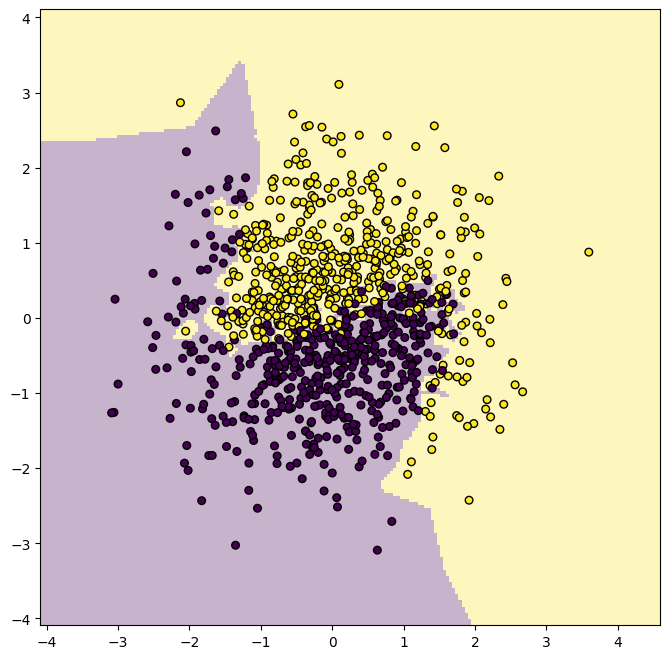

In [24]:
DBPlot(m, X, y, 200)